# Анализ результатов A/B теста

Структура работы будет выглядеть следующим образом: части => шаги.
___
##### Часть 1. Приоритизация гипотез
* [Шаг 1. Фреймворк ICE](#1-bullet)
* [Шаг 2. Фреймворк RICE](#2-bullet)

##### Часть 2. Анализ A/B-теста
* [Шаг 1. Изучение файлов с данными, получение общей информации](#3-bullet)
* [Шаг 2. Замена типа данных, обработка дубликатов](#4-bullet)
* [Шаг 3. Разбор А/В теста](#5-bullet)
     1. [Построение графиков кумулятивных величин, поиск границ для определения аномальных величин](#6-bullet)
     2. [Проверка гипотез, расчёт стат. значимости](#7-bullet)
     
##### [Вывод](#8-bullet)

## Часть 1. Приоритизация гипотез

### Шаг 1. Фреймворк ICE <a id='1-bullet'></a>

In [1]:
# Импортируем Pandas:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import scipy.stats as stats

In [2]:
# Откроем файл с гипотезами:
hypothesis = pd.read_csv('D:\hypothesis.csv')
# Выведем на экран:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
# Приведем названия столбцов к нижнему регистру (так азиатскому глазу приятнее):
hypothesis.columns = hypothesis.columns.str.lower()
# Проверим все ли ОК:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
# ICE:
hypothesis['ice'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(2)
# Для отображения полного текста гипотез сделаем следующее:
pd.options.display.max_colwidth = -1
# Отсортируем по убыванию и выведем на экран:
ice = hypothesis[['hypothesis','ice']].sort_values(by='ice', ascending=False)
ice

C:\Users\79518\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Рассчитав ICE для гипотез, выяснили, что в большем приоритете гипотезы 8, 0, 7.

### Шаг 2. Фреймворк RICE <a id='2-bullet'></a>

In [5]:
# RICE:
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
# Отсортируем по убыванию и выведем на экран:
rice = hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False)
rice

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


RICE показал, что наиболее перспективные гипотезы это 7, 2, 0.

#### Вывод

Посчитав ICE и RICE, выяснили, что по первому фреймворку самой перспективной оказалась 8 гипотеза, а по RICE 7. Так получилось, т.к. 7 гипотеза затрагивает очень много людей (reach 10, самый высокий среди гипотез). Охват гипотезы очень важен при приоритизации.

## Часть 2. Анализ A/B-теста

### Шаг 1. Импорт библиотек, изучение файлов с данными, получение общей информации <a id='3-bullet'></a>

In [6]:
# Импортируем нужные библиотеки:
import numpy as np

In [7]:
# Открываем файлы:
orders = pd.read_csv('D:\orders.csv')
visitors = pd.read_csv('D://visitors.csv')
# Выведем на экран первые 5 строк каждой:
display(orders.head(), visitors.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [8]:
# Выведем общую информацию о данных на экран:
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


#### Вывод

Для анализа имеем 2 таблицы: orders и visitors. В orders содержится информация о transactionId — идентификатор заказа; visitorId — идентификатор пользователя, совершившего заказ; date — дата, когда был совершён заказ; revenue — выручка заказа; group — группа A/B-теста, в которую попал заказ. В visitors: date — дата; group — группа A/B-теста; visitors — количество пользователей в указанную дату в указанной группе A/B-теста.
___
В таблице присутствуют следующие dtypes: object и int64. Пропусков в таблицах нет, это радует.

### Шаг 2. Замена типа данных, обработка дубликатов <a id='4-bullet'></a>

In [9]:
# Нужно заменить тип данных в столбцах date в обеих таблицах:
orders['date'] = pd.to_datetime(orders['date'], format='%Y.%m.%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y.%m.%d')
# Проверим всё ли ОК:
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [10]:
# Найдём количество дубликатов (одинаковых строк) в датафреймах, применив поочередно методы duplicated() и sum():
display(visitors.duplicated().sum(), orders.duplicated().sum())

0

0

### Шаг 3. Разбор А/В теста <a id='5-bullet'></a>

### 1. Построение графиков кумулятивных величин, поиск границ для определения аномальных величин <a id='6-bullet'></a>

In [11]:
# Создадим массив уникальных пар значений дат и групп теста (drop_duplicates не применяем, т.к. ранее узнали, что 
# дубликатов нет):
datesGroups = orders[['date','group']]
# получаем агрегированные кумулятивные по дням данные о заказах: 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == 
x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' :
'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
72,2019-08-01,A,24,20,148579
73,2019-08-01,A,24,20,148579
96,2019-08-01,A,24,20,148579
98,2019-08-01,A,24,20,148579
...,...,...,...,...,...
1023,2019-08-31,B,640,586,5907760
1024,2019-08-31,B,640,586,5907760
1026,2019-08-31,B,640,586,5907760
1037,2019-08-31,B,640,586,5907760


In [12]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина: 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == 
x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
72,2019-08-01,A,719
73,2019-08-01,A,719
96,2019-08-01,A,719
98,2019-08-01,A,719
...,...,...,...
1023,2019-08-31,B,18916
1024,2019-08-31,B,18916
1026,2019-08-31,B,18916
1037,2019-08-31,B,18916


In [13]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,A,24,20,148579,719
2,2019-08-01,A,24,20,148579,719
3,2019-08-01,A,24,20,148579,719
4,2019-08-01,A,24,20,148579,719


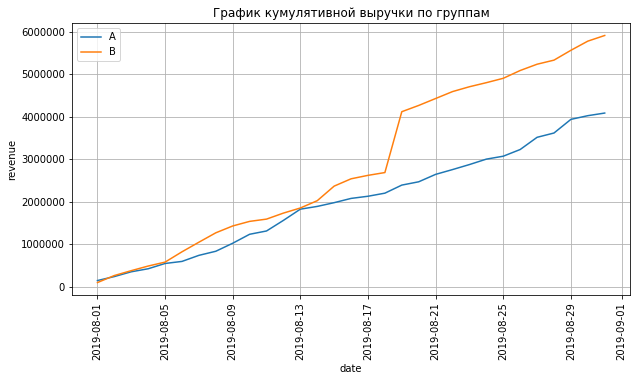

In [14]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize = (10, 5))
# Строим график выручки группы А
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.grid()
plt.title('График кумулятивной выручки по группам')
plt.xticks(rotation=90) 
plt.xlabel('date')
plt.ylabel('revenue');

По графику видно, что кумулятивная выручка группы А имеет линейный рост, без резких перепадов. Группа В росла линейно до определенного момента, но затем случился резкий скачок вверх - возможно это случилось из-за аномально дорогих заказов/покупок в тот период.

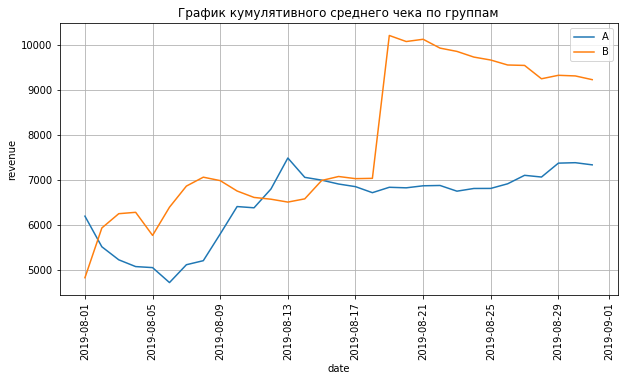

In [15]:
# Построим график кумулятивного среднего чека по группам:
plt.figure(figsize = (10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.grid()
plt.title('График кумулятивного среднего чека по группам')
plt.xticks(rotation=90) 
plt.xlabel('date')
plt.ylabel('revenue');

Средний чек стал более менее равномерным во второй половине теста для группы А. По группе В видим резкий рост среднего чека, а затем постепенное его снижение, скорее всего в тот период были крупные заказы, увеличившие так сильно средний чек. 

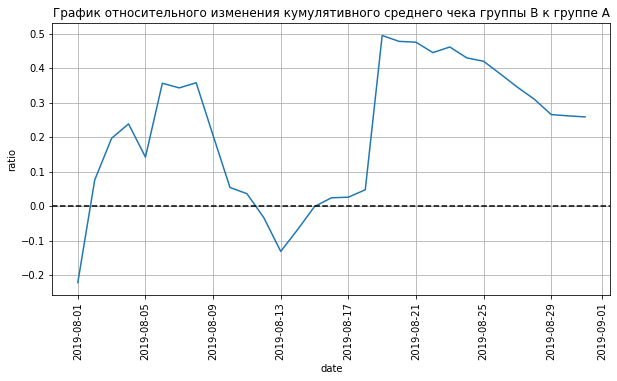

In [16]:
# Постройте график относительного изменения кумулятивного среднего чека группы B к группе A:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left',
                                                   suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize = (10, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.grid()
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=90) 
plt.ylabel('ratio')
plt.xlabel('date');

График получился скачкообразным, а это говорит нам, скорее всего, о наличии крупных заказов.

In [17]:
# Построим график кумулятивной конверсии:
# Считаем кумулятивную конверсию:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
# Посмотрим разброс:
cumulativeData['conversion'].describe()

count    24765.000000
mean     0.032655    
std      0.002135    
min      0.029217    
25%      0.030363    
50%      0.033166    
75%      0.034161    
max      0.036856    
Name: conversion, dtype: float64

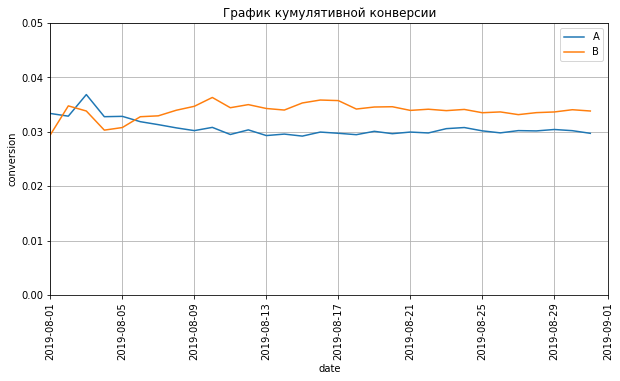

In [18]:
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize = (10, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.grid()
plt.title('График кумулятивной конверсии')
plt.xticks(rotation=90) 
plt.xlabel('date')
plt.ylabel('conversion');

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-09-01', 0, 0.05]);

Графики несимметричны. В самом начале конверсии были нестабильны, но затем конверсия по группе В стала выше, чем в группе А. Это зафиксировалось и продолжалось до конца теста.

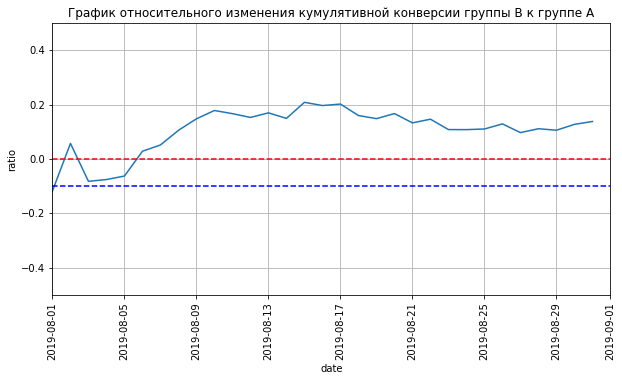

In [19]:
# Построим график относительного различия кумулятивных конверсий:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize = (10, 5))
plt.plot(mergedCumulativeConversions['date'], 
mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
label="График относительного изменения кумулятивной конверсии группы B к группе A")
plt.grid()
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xticks(rotation=90) 
plt.xlabel('date')
plt.ylabel('ratio')
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=-0.1, color='blue', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.5, 0.5]);

Сначала конверсия группы В была ниже конверсии группы А, но затем произошёл рост и до конца теста конверсия группы В выше, чем у группы А.

In [20]:
# Посчитаем количество заказов по пользователям:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False)\
.agg({'transactionId':'nunique'})
ordersByUsers.columns = ['visitorId','orders']
ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


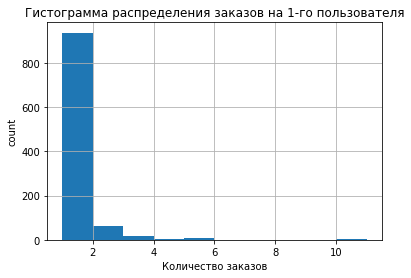

In [21]:
# Построим гистограмму:
ordersByUsers['orders'].hist()
plt.title('Гистограмма распределения заказов на 1-го пользователя')
plt.xlabel('Количество заказов')
plt.ylabel('count');

Большинство заказывало 1-2 раза, но есть и те, кто заказывали чаще. Построим точечный график количества заказов по пользователям.

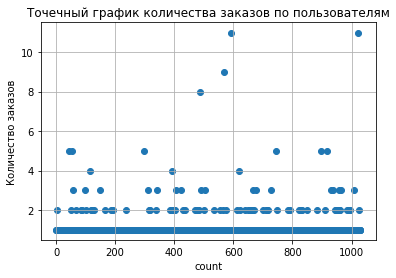

In [22]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.grid()
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('count')
plt.ylabel('Количество заказов');

Точечный график подтвердил наше предположение - много пользователей с 1-2 заказами. С помощью перцентилей отпределим аномалии.

In [23]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 2., 4.])

Не более 5% пользователей оформляли больше чем 2 заказа. И 10% пользователей заказывали более 1 раза. За нижнюю границу числа заказов возьмем 2. Далее построим точечный график стоимостей заказов.

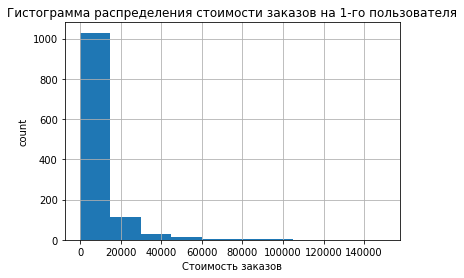

In [24]:
# Сначала взглянем на гистограмму:
orders['revenue'].hist(bins=10, range=(0, 150000))
plt.title('Гистограмма распределения стоимости заказов на 1-го пользователя')
plt.xlabel('Стоимость заказов')
plt.ylabel('count');

На гистограмме трудно не заметить, что присутствуют дорогие заказы. Взгялнем на них также через точечный график стоимостей заказов.

Text(0, 0.5, 'Стоимость заказов')

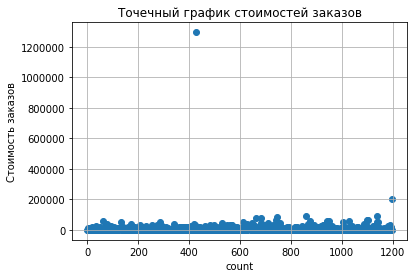

In [25]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.grid()
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.xlabel('count')
plt.ylabel('Стоимость заказов')

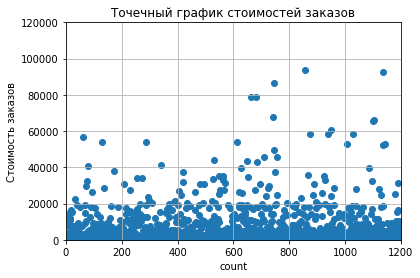

In [26]:
# Сделаем наш график нагляднее:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.grid()
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.xlabel('count')
plt.ylabel('Стоимость заказов')
plt.axis([0, 1200, 0, 120000]);

1-ый точечный график показал нам два выброса точно: это заказ 200 000 и 1 300 000. На 2-ом видно, что большинство заказов идёт до 40000. Обратимся к перцентилям, чтобы выбрать границу аномалий.

In [27]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

Не более 5% заказов дороже 28 000 и не более 1% дороже 58 233. Границей для определения аномальных заказов будем считать 30 000.

In [28]:
# Посчитаем статистическую значимость различий в конверсии и 
# среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей
# Разделим по группам и найдём число позьзователей по датам:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]\
                                            .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]\
                                            .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# Найдём кол-во покупок и сумму выручки в день по группам:
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']
# Мерджим, полученные выше, таблицы:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
# Выведем рез-т:
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Чтобы принять решение по рез-там теста, далее посчитаем статистическую значимость различий в конверсии и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей, затем по "очищенным" данным. Будем использовать st.mannwhitneyu(), потому что в данных есть выбросы. 

In [29]:
# Подготовим таблицы, по которым будем проверять гипотезы
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() \
                                                                       - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() \
                                                                    - len(ordersByUsersB['orders'])), name='orders')],axis=0)
# Cформулируем гипотезы:
# H0: статистически значимых различий в конверсии между группами нет 
# H1: статистически значимые различия в конверсии между группами есть
alpha = 0.05
results = st.mannwhitneyu(sampleA, sampleB)
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

p-значение:  0.008396177528376304
Отвергаем нулевую гипотезу: разница статистически значима
0.138


Т.к. 0.008 < 0.05, то значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем! Однако относительный выигрыш группы B равен 13.8%, т.е. конверсия по группе В на 13,8% выше! 

In [30]:
# Статистическая значимость различий в среднем чеке
# Cформулируем гипотезы:
# H0: статистически значимых различий в среднем чеке между группами нет 
# H1: статистически значимые различия в среднем чеке между группами есть
alpha = 0.05
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-значение:  0.3646454927716229
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
0.259


Т.к. 0.365 > 0.05, а значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A примерно на четверть.

In [31]:
# Найдём количество аномальных значений
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print('Всего', abnormalUsers.shape[0], 'аномальных значений')

Всего 68 аномальных значений


### 2. Проверка гипотез, расчёт стат. значимости <a id='7-bullet'></a>

In [32]:
# Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'], \
            pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'], \
            pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.007
0.172


Результаты по конверсии практически не изменились, единственное разница между конверсиями групп теперь не 13.8%, а 17.2%.

In [33]:
# Посчитаем статистическую значимость различий по среднему чеку между группами теста по очищенным данным
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.360
-0.023


Т.к. 0.360 > 0.05, а значит причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. p-value по сырым и очищенным данным практически равны.

## Вывод <a id='8-bullet'></a>

Итоги:
* Статистически значимые различия по конверсии между группами (по «сырым» и по данным после фильтрации аномалий) есть;
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
* График различия среднего чека говорит о том, что результаты группы B улучшились, сейчас они почти на 25% лучше по сравнению с группой А, но по очищенным данным средний чек группы В незначительно меньше (значит было достаточно аномально дорогих продаж);

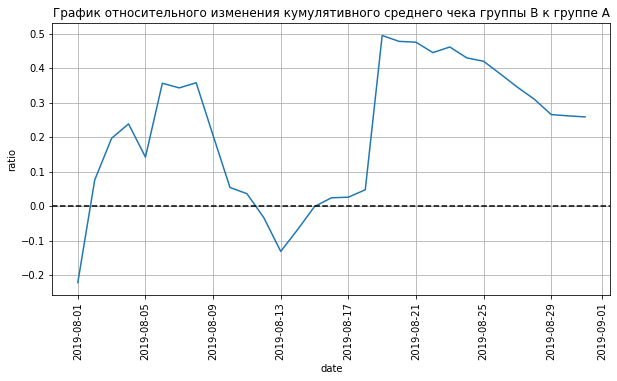

In [34]:
plt.figure(figsize = (10, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.grid()
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=90) 
plt.ylabel('ratio')
plt.xlabel('date');

* График различия конверсии между группами сообщает, что результаты группы B лучше группы A, конверсия по группе В на данный момент увеличивается.

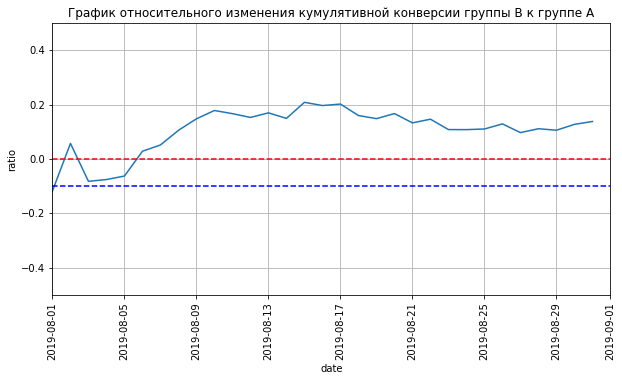

In [35]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.figure(figsize = (10, 5))
plt.plot(mergedCumulativeConversions['date'], 
mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
label="График относительного изменения кумулятивной конверсии группы B к группе A")
plt.grid()
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xticks(rotation=90) 
plt.xlabel('date')
plt.ylabel('ratio')
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=-0.1, color='blue', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.5, 0.5]);

Получается стат. значимые различия между группами есть по конверсии - у группы В она выше. Получается мы увеличили конверсию группы В, но стат. значимых различий между средними чеками исследуемых групп нет, однако график относительного изменения кумулятивного среднего чека группы B к группе A показывает преимущество группы В перед группой А примерно на 25%. Мне кажется, что тест нужно остановить и зафиксировать победу группы В.